In [43]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

In [75]:
imgs = torch.load('../data/corruptmnist/test_images.pt')
labels = torch.load('../data/corruptmnist/test_target.pt')

In [76]:
print(imgs.shape)
print(labels.shape)

torch.Size([5000, 28, 28])
torch.Size([5000])


In [77]:
torch.unique(labels)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
def plot_mnist_grid(images, grid_size):
    """
    Plots a grid of MNIST images.
    
    Args:
    images (torch.Tensor): A tensor of MNIST images.
    grid_size (int): The width/height of the square grid. 
                     The total number of images will be grid_size * grid_size.
    """
    # Select the first grid_size^2 images
    selected_images = images[:grid_size**2]

    # Create a grid of subplots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

    # Iterate over the grid and plot each image
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(selected_images[i], cmap='gray')
        ax.axis('off')  # Turn off the axis

    plt.show()

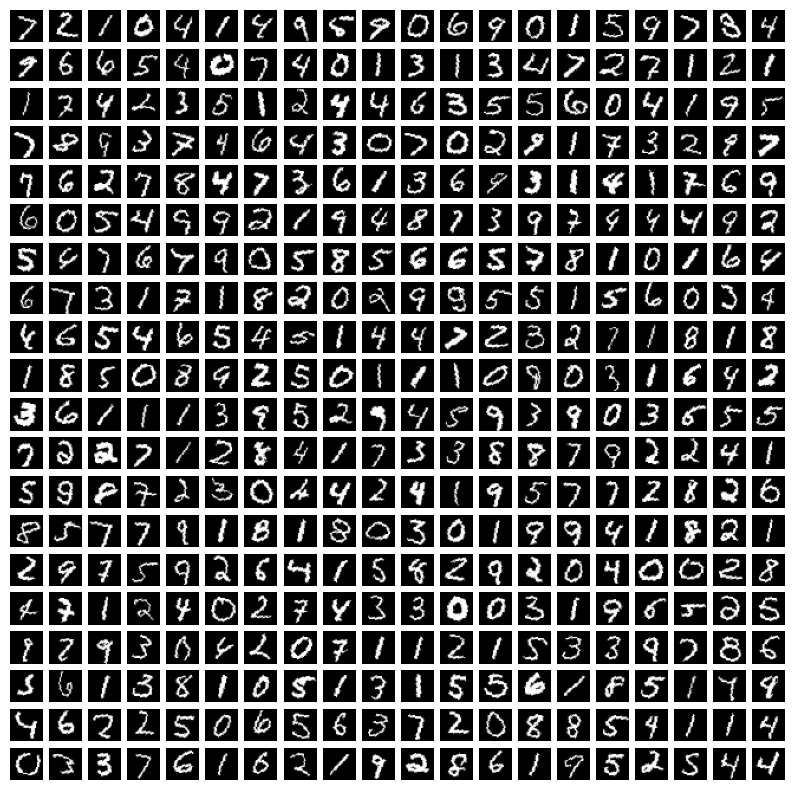

In [79]:
plot_mnist_grid(imgs, grid_size=20) 

In [51]:
class CorruptMNISTDataset(Dataset):
    def __init__(self, image_files, target_files):
        # Load all images and targets
        self.images = [torch.load(file) for file in image_files]
        self.targets = [torch.load(file) for file in target_files]

        # Flatten the list of images and targets
        self.images = torch.cat(self.images, dim=0)
        self.targets = torch.cat(self.targets, dim=0)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.targets[idx]

In [52]:
def mnist(batch_size = 64, num_workers=4):
    """Return train and test dataloaders for MNIST."""
    # Paths to your image and target files
    train_image_files = [f'../data/corruptmnist/train_images_{i}.pt' for i in range(1,6)]
    train_target_files = [f'../data/corruptmnist/train_target_{i}.pt' for i in range(1,6)]

    val_image_files = [f'../data/corruptmnist/train_images_0.pt']
    val_target_files = [f'../data/corruptmnist/train_target_0.pt']

    test_image_files = ['../data/corruptmnist/test_images.pt']
    test_target_files = [f'../data/corruptmnist/test_target.pt']

    train_dataset = CorruptMNISTDataset(train_image_files, train_target_files)
    val_dataset = CorruptMNISTDataset(val_image_files, val_target_files)
    test_dataset = CorruptMNISTDataset(test_image_files, test_target_files)

    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size, 
        shuffle=True,
        num_workers=num_workers
        )
    
    val_loader = DataLoader(
        val_dataset, 
        batch_size=batch_size, 
        shuffle=True,
        num_workers=num_workers
        )
    
    test_loader = DataLoader(
        test_dataset, 
        batch_size=batch_size, 
        shuffle=False,
        num_workers=num_workers
        )
    
    return train_loader, val_loader, test_loader

In [ ]:
train_image_files = [f'../data/corruptmnist/train_images_{i}.pt' for i in range(6)]

In [57]:
train_loader, test_loader = mnist(batch_size = 64, num_workers=0)

In [58]:
sample_img, sample_labels = next(iter(train_loader))

In [60]:
print(sample_img.shape)
print(sample_labels.shape)

torch.Size([64, 28, 28])
torch.Size([64])


In [67]:
img = sample_img[0]
lab = sample_labels[0].item()

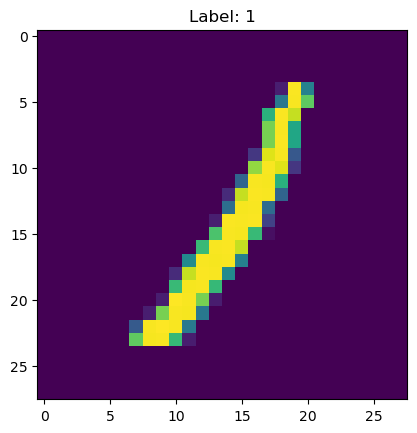

In [73]:
plt.imshow(img)
plt.title(f'Label: {lab}')
plt.show()